<a href="https://colab.research.google.com/github/eunsuh753/eunsuh753.github.io/blob/main/%EC%9D%80%EC%84%9C_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 파악

In [1]:
cd /content/drive/MyDrive/신용카드 연체 예측

/content/drive/MyDrive/신용카드 연체 예측


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [131]:
df = pd.read_csv("data/train.csv")
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [133]:
df.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [134]:
df.shape

(26457, 20)

### 중복 데이터 확인


In [138]:
df.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [139]:
cols = ['gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit']
df[df.duplicated(cols)]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
419,419,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-18820,-3185,1,0,1,0,Low-skill Laborers,2.0,-7.0,1.0
716,716,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21497,365243,1,0,0,0,NaN,1.0,-4.0,1.0
877,877,M,Y,N,2,180000.0,State servant,Secondary / secondary special,Married,House / apartment,-12240,-4663,1,0,0,0,Core staff,4.0,-24.0,2.0
1056,1056,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24665,365243,1,0,0,0,NaN,2.0,-35.0,2.0
1315,1315,F,Y,Y,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,-16137,-9391,1,0,1,0,Laborers,2.0,-29.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26374,26374,F,Y,N,0,112500.0,Working,Secondary / secondary special,Married,Municipal apartment,-17372,-978,1,0,1,0,Sales staff,2.0,-15.0,1.0
26393,26393,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-14122,-3383,1,0,0,0,Managers,2.0,-31.0,2.0
26428,26428,F,Y,Y,2,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-12745,-525,1,0,0,1,Core staff,4.0,-23.0,1.0
26446,26446,F,N,Y,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-16300,-9698,1,0,0,1,Managers,2.0,-41.0,2.0


In [140]:
df.drop_duplicates(cols, inplace=True)
df.shape

(24823, 20)

### 범주형 변수 파악

Working                 12787
Commercial associate     5832
Pensioner                4178
State servant            2020
Student                     6
Name: income_type, dtype: int64


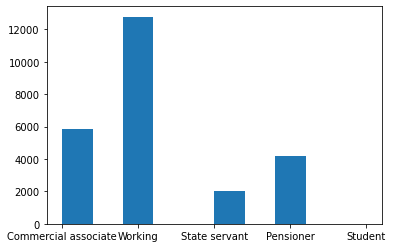

In [141]:
print(df.income_type.value_counts())
plt.hist(df.income_type)
plt.show()

Secondary / secondary special    16872
Higher education                  6725
Incomplete higher                  963
Lower secondary                    242
Academic degree                     21
Name: edu_type, dtype: int64


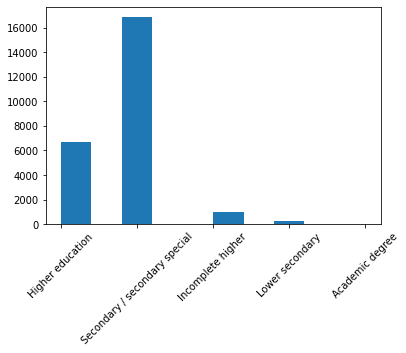

In [142]:
print(df.edu_type.value_counts())
plt.hist(df.edu_type)
plt.xticks(rotation=45)
plt.show()

Married                 17059
Single / not married     3284
Civil marriage           1993
Separated                1449
Widow                    1038
Name: family_type, dtype: int64


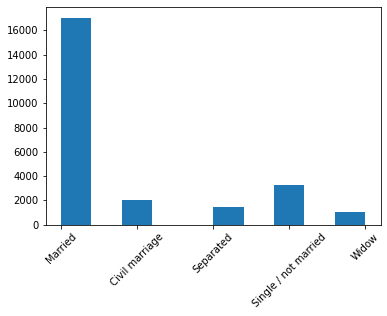

In [143]:
print(df.family_type.value_counts())
plt.hist(df.family_type)
plt.xticks(rotation=45)
plt.show()

House / apartment      22170
With parents            1197
Municipal apartment      784
Rented apartment         400
Office apartment         175
Co-op apartment           97
Name: house_type, dtype: int64


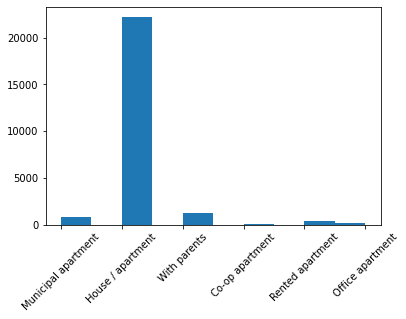

In [144]:
print(df.house_type.value_counts())
plt.hist(df.house_type)
plt.xticks(rotation=45)
plt.show()

In [145]:
print(df.occyp_type.value_counts(dropna=False))

NaN                      7613
Laborers                 4254
Core staff               2504
Sales staff              2382
Managers                 2024
Drivers                  1489
High skill tech staff     983
Accountants               838
Medicine staff            812
Cooking staff             433
Security staff            399
Cleaning staff            384
Private service staff     226
Waiters/barmen staff      118
Low-skill Laborers        115
Secretaries                94
Realty agents              58
HR staff                   57
IT staff                   40
Name: occyp_type, dtype: int64


In [146]:
df.FLAG_MOBIL.value_counts()

1    24823
Name: FLAG_MOBIL, dtype: int64

- FLAG_MOBIL 모든 값이 1이므로 제거

In [147]:
df.drop(['FLAG_MOBIL'], axis=1, inplace=True)
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0


# 2. 전처리

### 결측치

In [148]:
df.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       7613
family_size         0
begin_month         0
credit              0
dtype: int64

In [149]:
df[df['income_type']=='Pensioner']['occyp_type'].value_counts(dropna=False)

NaN               4169
Laborers             3
Core staff           2
Medicine staff       1
Accountants          1
Managers             1
Drivers              1
Name: occyp_type, dtype: int64

- income_type이 Pensioner인 행의 occyp_type은 대부분 결측치  
=> 결측 중 income_type이 Pensioner인 사람은 'Pensioner'라는 새로운 occyp_type 지정

In [150]:
df['occyp_type'] = np.where(((pd.notnull(df['occyp_type'])==False) & (df['income_type']=='Pensioner')), 'Pensioner', df['occyp_type'])

In [151]:
df.occyp_type.isnull().sum()

3444

- 남은 3731개의 결측치 처리는 추후 진행

### 파생 변수

In [152]:
# 음수값 절댓값 취해서 양수로 변환

feats = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for feat in feats:
    df[feat]=np.abs(df[feat])

In [153]:
# 이해하기 쉽게 나이와 근속년차 변수 생성

df['Age'] = df['DAYS_BIRTH']//365
df['career_year'] = np.ceil(df['DAYS_EMPLOYED']/365)
df['career_start_age'] = df['Age'] - df['career_year']
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,Age,career_year,career_start_age
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,NaN,2.0,6.0,1.0,38,13.0,25.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0,31,5.0,26.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0,52,13.0,39.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2.0,37.0,0.0,41,6.0,35.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2.0,26.0,2.0,41,6.0,35.0


In [154]:
df[df['income_type']=='Pensioner']['DAYS_EMPLOYED'].value_counts()

365243    4167
5521         1
443          1
586          1
198          1
3680         1
1325         1
673          1
2208         1
2745         1
672          1
620          1
Name: DAYS_EMPLOYED, dtype: int64

- income_type이 Pensioner인 행의 DAYS_EMPLOYED 값이 대부분 이상치(365243)로 설정되어 있는 문제  
=> 

In [155]:
# 연금받는 사람들 나이의 중앙값
a = df[df['income_type']=='Pensioner']['Age'].median()

In [156]:
# 연금받는 사람들이 아닌 사람들 업무 시작 나이의 중앙값
b = df[df['income_type']!='Pensioner']['career_start_age'].median()

=> 연금받는 사람들의 근속년수를 (a-b)로 대체

In [157]:
df['career_year'] = np.where(((df['income_type']=='Pensioner') & (df['DAYS_EMPLOYED']==365243)), (a-b), df['career_year'])

In [158]:
# 이에 맞게 'DAYS_EMPLOYED'도 수정
df['DAYS_EMPLOYED'] = np.where(((df['income_type']=='Pensioner') & (df['DAYS_EMPLOYED']==365243)), (a-b)*365, df['DAYS_EMPLOYED'])

In [159]:
df['career_start_age'] = df['Age'] - df['career_year']
df[df['income_type']=='Pensioner'][['DAYS_EMPLOYED', 'career_year', 'career_start_age']]

,DAYS_EMPLOYED,career_year,career_start_age
14,10585.0,29.0,33.0
18,10585.0,29.0,34.0
21,10585.0,29.0,29.0
24,10585.0,29.0,32.0
46,10585.0,29.0,28.0
...,...,...,...
26431,10585.0,29.0,28.0
26432,10585.0,29.0,32.0
26439,10585.0,29.0,23.0
26441,10585.0,29.0,37.0


- occyp_type 변수를 income_total변수를 기준으로 categorizing하려하였으나 income_total변수와의 다중공선성 문제로 occyp_type 변수를 아예 삭제하기로 결정하였음

In [127]:
# df.to_csv("train_ppc.csv")